<a href="https://colab.research.google.com/github/YzdnByat/Artificial-Intelligence-/blob/main/HW1/AI_Aliyari_HW1_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [ ]:
کتابخانه هایی که در طول حل سوال یه انها نیاز داشتیم.

In [4]:
iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

train_df = train_df.copy()
test_df = test_df.copy()
train_df['dataset'] = 'training'
test_df['dataset'] = 'testing'

در این کد، داده‌های مربوط به گل زنبق بارگذاری شده و در یک دیتافریم قرار گرفته‌اند. سپس یک ستون جدید برای نام گونه‌های گل اضافه شده است. داده‌ها به دو بخش آموزشی (۸۰٪) و آزمایشی (۲۰٪) تقسیم شده‌اند. در نهایت، یک ستون جدید برای مشخص کردن مجموعه داده (آموزشی یا آزمایشی) به هر بخش افزوده شده است.

In [5]:
merged_df = pd.concat([train_df, test_df]).reset_index(drop=True)

print("Merged DataFrame:")
print(merged_df.head())

Merged DataFrame:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                4.6               3.6                1.0               0.2   
1                5.7               4.4                1.5               0.4   
2                6.7               3.1                4.4               1.4   
3                4.8               3.4                1.6               0.2   
4                4.4               3.2                1.3               0.2   

      species   dataset  
0      setosa  training  
1      setosa  training  
2  versicolor  training  
3      setosa  training  
4      setosa  training  


در این بخش از کد، دو مجموعه داده‌ی آموزشی و آزمایشی با یکدیگر ترکیب شده‌اند و یک دیتافریم جدید ایجاد شده است. سپس، ایندکس‌های آن بازنشانی (reset) شده‌اند تا پیوستگی حفظ شود. در نهایت، پنج سطر اول دیتافریم ادغام‌شده چاپ شده است.

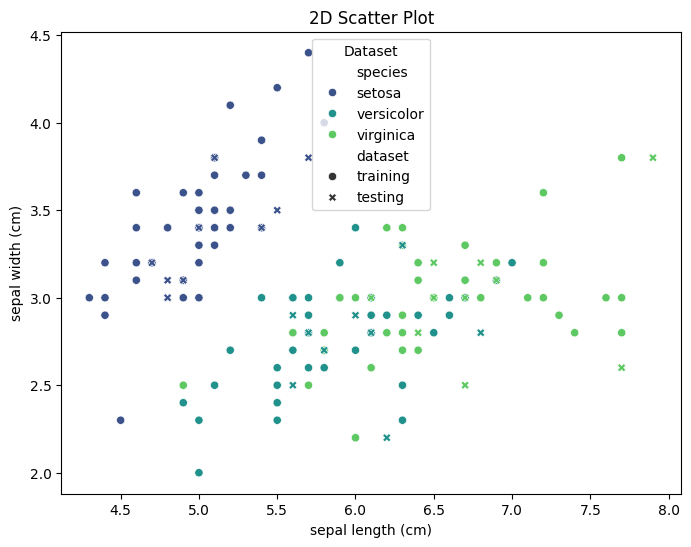

In [6]:
feature_x = "sepal length (cm)"
feature_y = "sepal width (cm)"

plt.figure(figsize=(8, 6))
sns.scatterplot(x=merged_df[feature_x], y=merged_df[feature_y], hue=merged_df['species'], style=merged_df['dataset'], palette="viridis")
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.title("2D Scatter Plot")
plt.legend(title="Dataset")
plt.show()

در این کد، یک نمودار پراکندگی دو بعدی رسم شده است که در آن طول و عرض کاسبرگ نمایش داده می‌شود. داده‌ها بر اساس گونه‌ی گل با رنگ‌های مختلف و بر اساس مجموعه‌ی داده (آموزشی یا آزمایشی) با سبک‌های متفاوت نشان داده شده‌اند. عنوان و برچسب‌های محورهای نمودار مشخص شده و در نهایت، نمودار نمایش داده می‌شود.

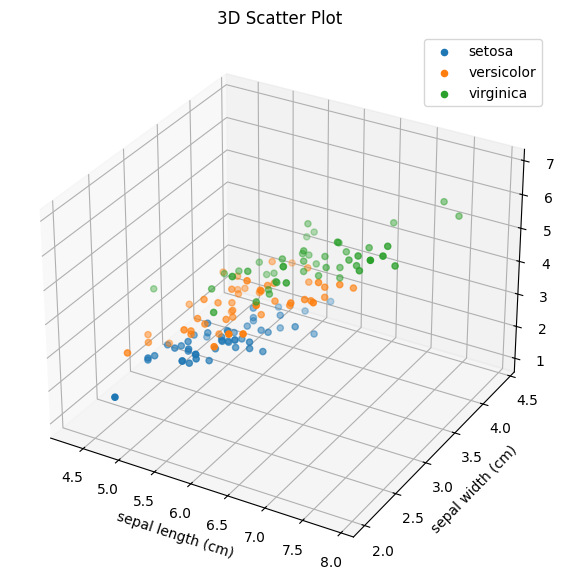

In [7]:
feature_x = "sepal length (cm)"
feature_y = "sepal width (cm)"
feature_z = "petal length (cm)"

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for species in merged_df['species'].unique():
    subset = merged_df[merged_df['species'] == species]
    ax.scatter(subset[feature_x], subset[feature_y], subset[feature_z], label=species)

ax.set_xlabel(feature_x)
ax.set_ylabel(feature_y)
ax.set_zlabel(feature_z)
ax.set_title("3D Scatter Plot")
ax.legend()
plt.show()

در این کد، یک نمودار پراکندگی سه‌بعدی رسم شده است که در آن طول و عرض کاسبرگ وطول گلبرگ نمایش داده می‌شوند. داده‌ها بر اساس گونه‌ی گل گروه‌بندی شده و هر گروه با رنگ متفاوت مشخص شده است. برچسب‌های محورهای نمودار تنظیم شده، عنوان اضافه شده و یک راهنما (legend) برای تشخیص گونه‌ها نمایش داده شده است. در نهایت، نمودار نمایش داده می‌شود.

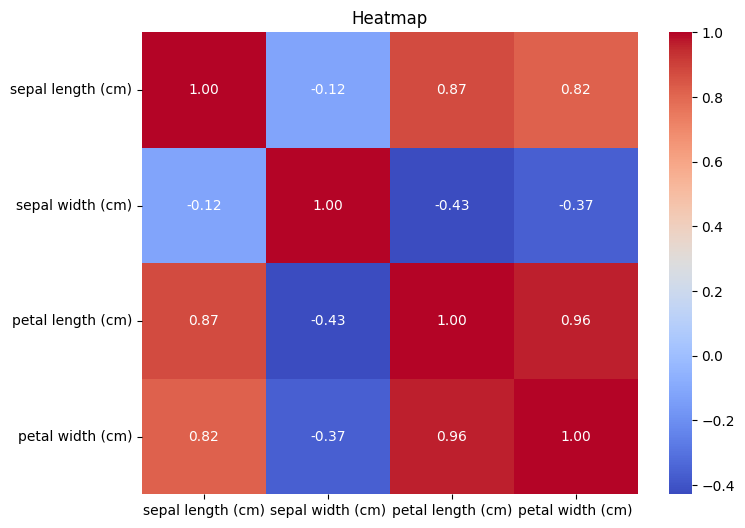

In [8]:
numeric_df = df.drop(columns=['species'], errors='ignore')
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap")
plt.show()

در این کد، یک نقشه‌ی حرارتی برای نمایش میزان همبستگی بین ویژگی‌های عددی مجموعه داده رسم شده است. ابتدا ستون گونه‌ی گل حذف شده تا فقط ویژگی‌های عددی باقی بمانند. سپس، ماتریس همبستگی محاسبه و با استفاده از رنگ‌های متضاد نمایش داده شده است. مقادیر همبستگی روی هر خانه نوشته شده و در نهایت، نمودار نمایش داده می‌شود.

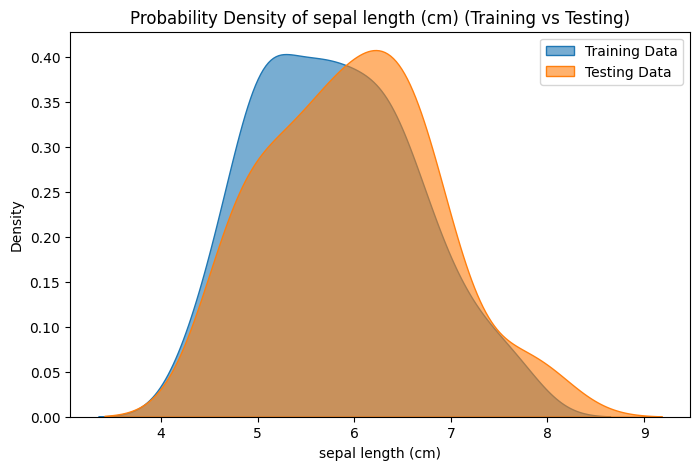

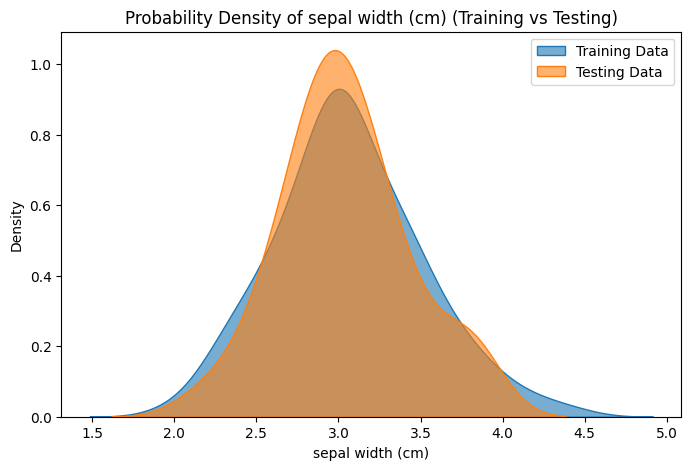

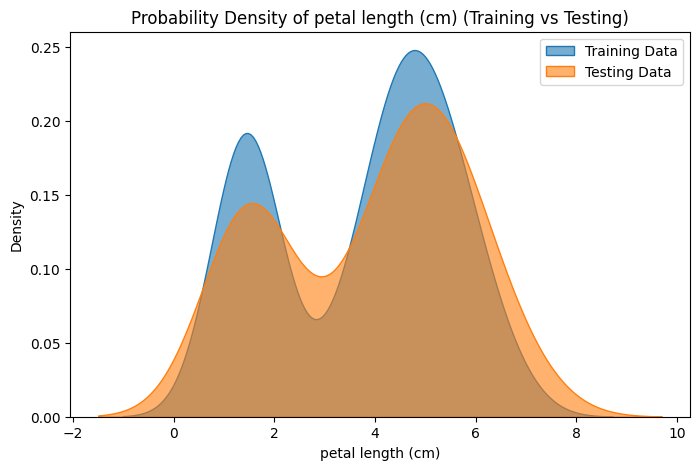

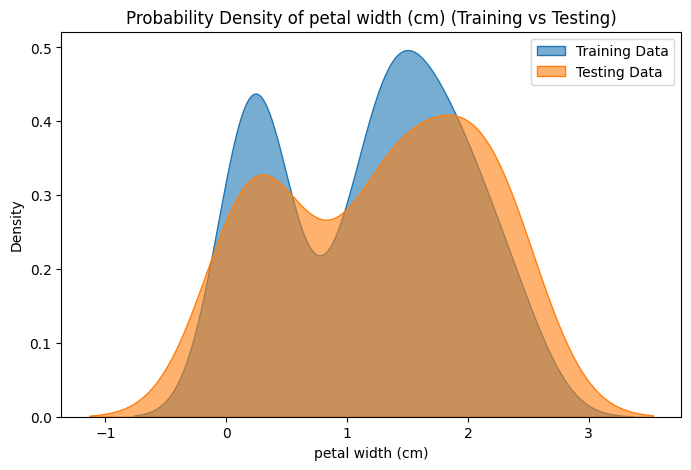

In [9]:
features = df.columns[:-1]
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(train_df[feature], label="Training Data", fill=True, alpha=0.6)
    sns.kdeplot(test_df[feature], label="Testing Data", fill=True, alpha=0.6)
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.title(f"Probability Density of {feature} (Training vs Testing)")
    plt.legend()
    plt.show()

در این کد، برای هر ویژگی عددی مجموعه داده، یک نمودار چگالی احتمال (KDE plot) رسم شده است. ابتدا نام ویژگی‌های عددی (بدون در نظر گرفتن ستون گونه‌ی گل) استخراج می‌شود. سپس برای هر ویژگی، یک نمودار جداگانه رسم شده که توزیع مقادیر آن را در داده‌های آموزشی و آزمایشی مقایسه می‌کند. برای نمایش بهتر، منحنی‌های چگالی به‌صورت رنگی و نیمه شفاف ترسیم شده‌اند. در نهایت، برچسب‌های محور و عنوان تنظیم شده و نمودار نمایش داده می‌شود.

In [11]:
feature_to_bin = "sepal length (cm)"
bin_labels = ["Short", "Medium", "Tall"]
df["sepal_length_category"] = pd.qcut(df[feature_to_bin], q=3, labels=bin_labels)

print("\nDataFrame with Categorical Feature:")
print(df[[feature_to_bin, "sepal_length_category"]])


DataFrame with Categorical Feature:
     sepal length (cm) sepal_length_category
0                  5.1                 Short
1                  4.9                 Short
2                  4.7                 Short
3                  4.6                 Short
4                  5.0                 Short
..                 ...                   ...
145                6.7                  Tall
146                6.3                Medium
147                6.5                  Tall
148                6.2                Medium
149                5.9                Medium

[150 rows x 2 columns]


در این کد، مقادیر ویژگی طول کاسبرگ به سه دسته‌ی جداگانه تقسیم شده‌اند. ابتدا، مقدار این ویژگی به سه بخش برابر از نظر تعداد نمونه تقسیم شده و برای هر بخش یک برچسب Short, Medium, Tall اختصاص داده شده است. سپس، ستون جدیدی به نام sepal_length_category به دیتافریم اضافه شده که مقدار دسته‌بندی شده‌ی این ویژگی را نشان می‌دهد. در نهایت، مقادیر ستون اصلی و نسخه‌ی دسته‌بندی‌شده‌ی آن چاپ شده‌اند.

In [12]:
setosa_stats = df[df['species'] == 'setosa'].describe()
print("\nStatistical Summary for Setosa Class:")
print(setosa_stats)


Statistical Summary for Setosa Class:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count           50.00000         50.000000          50.000000   
mean             5.00600          3.428000           1.462000   
std              0.35249          0.379064           0.173664   
min              4.30000          2.300000           1.000000   
25%              4.80000          3.200000           1.400000   
50%              5.00000          3.400000           1.500000   
75%              5.20000          3.675000           1.575000   
max              5.80000          4.400000           1.900000   

       petal width (cm)  
count         50.000000  
mean           0.246000  
std            0.105386  
min            0.100000  
25%            0.200000  
50%            0.200000  
75%            0.300000  
max            0.600000  


در این کد، خلاصه‌ای آماری از داده‌های مربوط به گونه‌ی setosa محاسبه شده است. ابتدا، داده‌های مربوط به این گونه فیلتر شده و سپس، از تابع `describe()` برای نمایش آمار توصیفی مانند میانگین، انحراف معیار، حداقل، حداکثر و چارک‌ها استفاده شده است. در نهایت، این خلاصه‌ی آماری چاپ شده است.